# Interactions from the literature

In [39]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [1]:
import json
import numpy as np

studies = [ { 'name' : 'Gopher, Lice',
              'type' : 'parasitism',
              'host' : 'data/gopher-louse/gopher.tree',
              'guest': 'data/gopher-louse/lice.tree',
              'links': 'data/gopher-louse/links.csv' },
           
            { 'name' : 'Sedge, Smut',
              'type' : 'parasitism',
              'host' : 'data/sedge-smut/host.tree',
              'guest': 'data/sedge-smut/guest.tree',
              'links': 'data/sedge-smut/links.csv' },
           
            { 'name' : 'Fish, Worm',
              'type' : 'parasitism',
              'host' : 'data/fish-worm/host.tree',
              'guest': 'data/fish-worm/guest.tree',
              'links': 'data/fish-worm/links.csv' },
           
            { 'name' : 'beeh',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/beeh/plant.tree',
              'guest': 'data/plant-pollinators/beeh/animal.tree',
              'links': 'data/plant-pollinators/beeh/beeh_links.csv' },

            { 'name' : 'arr1',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/arr1/plant.tree',
              'guest': 'data/plant-pollinators/arr1/animal.tree',
              'links': 'data/plant-pollinators/arr1/arr1_links.csv' },
           
            { 'name' : 'arr2',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/arr2/plant.tree',
              'guest': 'data/plant-pollinators/arr2/animal.tree',
              'links': 'data/plant-pollinators/arr2/arr2_links.csv' },
           
            { 'name' : 'arr3',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/arr3/plant.tree',
              'guest': 'data/plant-pollinators/arr3/animal.tree',
              'links': 'data/plant-pollinators/arr3/arr3_links.csv' },
           
            { 'name' : 'bair',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/bair/plant.tree',
              'guest': 'data/plant-pollinators/bair/animal.tree',
              'links': 'data/plant-pollinators/bair/bair_links.csv' },
            
            { 'name' : 'cacg',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/cacg/plant.tree',
              'guest': 'data/plant-pollinators/cacg/animal.tree',
              'links': 'data/plant-pollinators/cacg/cacg_links.csv' },
           
            { 'name' : 'caco',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/caco/plant.tree',
              'guest': 'data/plant-pollinators/caco/animal.tree',
              'links': 'data/plant-pollinators/caco/caco_links.csv' },
           
            { 'name' : 'caci',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/caci/plant.tree',
              'guest': 'data/plant-pollinators/caci/animal.tree',
              'links': 'data/plant-pollinators/caci/caci_links.csv' },
           
            { 'name' : 'cafr',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/cafr/plant.tree',
              'guest': 'data/plant-pollinators/cafr/animal.tree',
              'links': 'data/plant-pollinators/cafr/cafr_links.csv' },
           
            { 'name' : 'cllo',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/cllo/plant.tree',
              'guest': 'data/plant-pollinators/cllo/animal.tree',
              'links': 'data/plant-pollinators/cllo/cllo_links.csv' },
           
            { 'name' : 'crom',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/crom/plant.tree',
              'guest': 'data/plant-pollinators/crom/animal.tree',
              'links': 'data/plant-pollinators/crom/crom_links.csv' },
           
            { 'name' : 'dihi',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/dihi/plant.tree',
              'guest': 'data/plant-pollinators/dihi/animal.tree',
              'links': 'data/plant-pollinators/dihi/dihi_links.csv' },
           
            { 'name' : 'dish',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/dish/plant.tree',
              'guest': 'data/plant-pollinators/dish/animal.tree',
              'links': 'data/plant-pollinators/dish/dish_links.csv' },
           
            { 'name' : 'dupo',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/dupo/plant.tree',
              'guest': 'data/plant-pollinators/dupo/animal.tree',
              'links': 'data/plant-pollinators/dupo/dupo_links.csv' },
           
            { 'name' : 'eol',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/eol/plant.tree',
              'guest': 'data/plant-pollinators/eol/animal.tree',
              'links': 'data/plant-pollinators/eol/eol_links.csv' },
           
            { 'name' : 'eolz',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/eolz/plant.tree',
              'guest': 'data/plant-pollinators/eolz/animal.tree',
              'links': 'data/plant-pollinators/eolz/eolz_links.csv' },
           
            { 'name' : 'eski',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/eski/plant.tree',
              'guest': 'data/plant-pollinators/eski/animal.tree',
              'links': 'data/plant-pollinators/eski/eski_links.csv' },
           
            { 'name' : 'fros',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/fros/plant.tree',
              'guest': 'data/plant-pollinators/fros/animal.tree',
              'links': 'data/plant-pollinators/fros/fros_links.csv' },
           
            { 'name' : 'gen1',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/gen1/plant.tree',
              'guest': 'data/plant-pollinators/gen1/animal.tree',
              'links': 'data/plant-pollinators/gen1/gen1_links.csv' },
           
            { 'name' : 'gen2',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/gen2/plant.tree',
              'guest': 'data/plant-pollinators/gen2/animal.tree',
              'links': 'data/plant-pollinators/gen2/gen2_links.csv' },
           
            { 'name' : 'hamm',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/hamm/plant.tree',
              'guest': 'data/plant-pollinators/hamm/animal.tree',
              'links': 'data/plant-pollinators/hamm/hamm_links.csv' },
           
            { 'name' : 'herr',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/herr/plant.tree',
              'guest': 'data/plant-pollinators/herr/animal.tree',
              'links': 'data/plant-pollinators/herr/herr_links.csv' },
           
            { 'name' : 'hock',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/hock/plant.tree',
              'guest': 'data/plant-pollinators/hock/animal.tree',
              'links': 'data/plant-pollinators/hock/hock_links.csv' },

            { 'name' : 'hrat',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/hrat/plant.tree',
              'guest': 'data/plant-pollinators/hrat/animal.tree',
              'links': 'data/plant-pollinators/hrat/hrat_links.csv' },
           
            { 'name' : 'inpk',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/inpk/plant.tree',
              'guest': 'data/plant-pollinators/inpk/animal.tree',
              'links': 'data/plant-pollinators/inpk/inpk_links.csv' },
           
            { 'name' : 'kant',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/kant/plant.tree',
              'guest': 'data/plant-pollinators/kant/animal.tree',
              'links': 'data/plant-pollinators/kant/kant_links.csv' },
           
            { 'name' : 'kevn',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/kevn/plant.tree',
              'guest': 'data/plant-pollinators/kevn/animal.tree',
              'links': 'data/plant-pollinators/kevn/kevn_links.csv' },

            { 'name' : 'lope',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/lope/plant.tree',
              'guest': 'data/plant-pollinators/lope/animal.tree',
              'links': 'data/plant-pollinators/lope/lope_links.csv' },
           
            { 'name' : 'mack',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/mack/plant.tree',
              'guest': 'data/plant-pollinators/mack/animal.tree',
              'links': 'data/plant-pollinators/mack/mack_links.csv' },

            { 'name' : 'med1',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/med1/plant.tree',
              'guest': 'data/plant-pollinators/med1/animal.tree',
              'links': 'data/plant-pollinators/med1/med1_links.csv' },

            { 'name' : 'med2',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/med2/plant.tree',
              'guest': 'data/plant-pollinators/med2/animal.tree',
              'links': 'data/plant-pollinators/med2/med2_links.csv' },
           
            { 'name' : 'memm',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/med2/plant.tree',
              'guest': 'data/plant-pollinators/med2/animal.tree',
              'links': 'data/plant-pollinators/med2/med2_links.csv' },
           
            { 'name' : 'moma',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/moma/plant.tree',
              'guest': 'data/plant-pollinators/moma/animal.tree',
              'links': 'data/plant-pollinators/moma/moma_links.csv' },

            { 'name' : 'mont',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/mont/plant.tree',
              'guest': 'data/plant-pollinators/mont/animal.tree',
              'links': 'data/plant-pollinators/mont/mont_links.csv' },

            { 'name' : 'mott',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/mott/plant.tree',
              'guest': 'data/plant-pollinators/mott/animal.tree',
              'links': 'data/plant-pollinators/mott/mott_links.csv' },
           
            { 'name' : 'mull',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/mull/plant.tree',
              'guest': 'data/plant-pollinators/mull/animal.tree',
              'links': 'data/plant-pollinators/mull/mull_links.csv' },

            { 'name' : 'ncor',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/ncor/plant.tree',
              'guest': 'data/plant-pollinators/ncor/animal.tree',
              'links': 'data/plant-pollinators/ncor/ncor_links.csv' },           

            { 'name' : 'nnog',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/nnog/plant.tree',
              'guest': 'data/plant-pollinators/nnog/animal.tree',
              'links': 'data/plant-pollinators/nnog/nnog_links.csv' },

            { 'name' : 'olau',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/olau/plant.tree',
              'guest': 'data/plant-pollinators/olau/animal.tree',
              'links': 'data/plant-pollinators/olau/olau_links.csv' },

            { 'name' : 'perc',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/perc/plant.tree',
              'guest': 'data/plant-pollinators/perc/animal.tree',
              'links': 'data/plant-pollinators/perc/perc_links.csv' },

            { 'name' : 'rabr',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/rabr/plant.tree',
              'guest': 'data/plant-pollinators/rabr/animal.tree',
              'links': 'data/plant-pollinators/rabr/rabr_links.csv' }, 
           
            { 'name' : 'rmrz',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/rmrz/plant.tree',
              'guest': 'data/plant-pollinators/rmrz/animal.tree',
              'links': 'data/plant-pollinators/rmrz/rmrz_links.csv' },
           
            { 'name' : 'sapf',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/sapf/plant.tree',
              'guest': 'data/plant-pollinators/sapf/animal.tree',
              'links': 'data/plant-pollinators/sapf/sapf_links.csv' },
           
            { 'name' : 'schm',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/schm/plant.tree',
              'guest': 'data/plant-pollinators/schm/animal.tree',
              'links': 'data/plant-pollinators/schm/schm_links.csv' },
           
            { 'name' : 'smal',
              'type' : 'pollination',
              'host' : 'data/plant-pollinators/smal/plant.tree',
              'guest': 'data/plant-pollinators/smal/animal.tree',
              'links': 'data/plant-pollinators/smal/smal_links.csv' },
           
            { 'name' : 'snow',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/snow/plant.tree',
              'guest': 'data/plant-pollinators/snow/animal.tree',
              'links': 'data/plant-pollinators/snow/snow_links.csv' },
        
            { 'name' : 'wes',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/wes/plant.tree',
              'guest': 'data/plant-pollinators/wes/animal.tree',
              'links': 'data/plant-pollinators/wes/wes_links.csv' },
           
            { 'name' : 'wyth',
              'type' : 'frugivory',
              'host' : 'data/plant-pollinators/wyth/plant.tree',
              'guest': 'data/plant-pollinators/wyth/animal.tree',
              'links': 'data/plant-pollinators/wyth/wyth_links.csv' },           
          ]

null_studies = []

for i in xrange(50) :
    name = 'null' + str(i)
    path = 'data/simulated/null/' + name
    s = { 'name'  : name,
          'type'  : 'null',
          'host'  : path + '/host.tree',
          'guest' : path + '/guest.tree',
          'links' : path + '/links.csv' }
    null_studies.append(s)

perfect_studies = []

for i in xrange(50) :
    name = 'perfect' + str(i)
    path = 'data/simulated/perfect/' + name
    s = { 'name'  : name,
          'type'  : 'perfect',
          'host'  : path + '/host.tree',
          'guest' : path + '/guest.tree',
          'links' : path + '/links.csv' }
    perfect_studies.append(s)
    
with open( 'studies.json', 'w' ) as f :
    json.dump( studies + null_studies + perfect_studies, f )

## Simulated interactions

This notebook generates simulated datasets of phylogenies of interacting
groups of species.

There are two kinds of simulated data : Null data sets, consisting of two randomly generated
trees with random links between leafs, and "perfect" data sets, consisting of identical trees
with leaves linked in a bijection.

In [21]:
## Null datasets

import pandas as pd
import dendropy
import os

N_min, N_max = 10, 200

for i in xrange(50) :
    
    N = np.random.randint( N_min, N_max )
    M = np.random.randint( N_min, N_max )
    L = np.random.randint( 0.5*( N+M ), 4.0*( N+M ) )

    host_taxa =  [ 'host_'  + str(x) for x in xrange(N) ]
    guest_taxa = [ 'guest_' + str(x) for x in xrange(M) ]
    
    ht = dendropy.simulate.treesim.birth_death_tree( 1.0, 0.5, 
                                                     #birth_rate_sd=0.5, death_rate_sd=0.5,
                                                     ntax=len(host_taxa) )
    
    gt = dendropy.simulate.treesim.birth_death_tree( 1.0, 0.5, 
                                                     #birth_rate_sd=0.5, death_rate_sd=0.5,
                                                     ntax=len(guest_taxa) )
    
    for leaf,name in zip(ht.leaf_node_iter(),host_taxa) :
        leaf.taxon.label = name
    
    for leaf,name in zip(gt.leaf_node_iter(),guest_taxa) :
        leaf.taxon.label = name
    
    lm = np.zeros( (N,M) )
    for j in xrange( L ) :
        lm[ np.random.randint(N), np.random.randint(M) ] = 1
    
    lmdf = pd.DataFrame( lm, columns=guest_taxa, index=host_taxa, dtype=int )
    
    path = 'simulated/null/null' + str(i) +'/'
    if not os.path.exists( path ) :
        os.mkdir( path )

    ht.write( file=open( path + 'host.tree', 'w'),  schema='newick' )
    gt.write( file=open( path + 'guest.tree', 'w'), schema='newick' )
    lmdf.to_csv( path + 'links.csv' )

In [26]:
## "Perfect" datasets

import numpy as np
import pandas as pd
import dendropy
import os

N_min, N_max = 10, 200

for i in xrange(50) :
    
    N = np.random.randint( N_min, N_max )
    
    path = 'simulated/perfect/perfect' + str(i) +'/'
    if not os.path.exists( path ) :
        os.mkdir( path )
        
    host_taxa =  [ 'host_'  + str(x) for x in xrange(N) ]
    guest_taxa = [ 'guest_' + str(x) for x in xrange(N) ]
    
    t = dendropy.simulate.treesim.birth_death_tree( 1.0, 0.5, 
                                                    #birth_rate_sd=0.5, death_rate_sd=0.5,
                                                    ntax=len(host_taxa) )
        
    for leaf,name in zip(t.leaf_node_iter(),host_taxa) :
        leaf.taxon.label = name
    
    t.write( file=open( path + 'host.tree', 'w'),  schema='newick' )
    
    for leaf,name in zip(t.leaf_node_iter(),guest_taxa) :
        leaf.taxon.label = name
    
    t.write( file=open( path + 'guest.tree', 'w'), schema='newick' )
    
    lm = np.zeros( (N,N) )
    for j in xrange(N) :
        lm[ j, j ] = 1
    
    lmdf = pd.DataFrame( lm, columns=guest_taxa, index=host_taxa, dtype=int )
    
    lmdf.to_csv( path + 'links.csv' )

## Data integrity

Most of the time, datasets from the literature are broken in some way. 
Here are some useful routines for checking their integrity and fixing errors.

In [303]:
from SuchTree import SuchTree, SuchLinkedTrees
import pandas as pd
import seaborn

name = 'snow'

T1 = SuchTree( 'plant-pollinators/' + name + '/plant.tree' )
T2 = SuchTree( 'plant-pollinators/' + name + '/animal.tree' )
links = pd.DataFrame.from_csv( 'plant-pollinators/' + name + '/' + name + '_links.csv' )
links = links.loc[ T1.leafs.keys() ]
links = links[ T2.leafs.keys() ]
SLT = SuchLinkedTrees( T1, T2, links )

In [302]:
links = pd.DataFrame.from_csv( 'plant-pollinators/' + name + '/' + name + '_links.csv' )

set( T2.leafs.keys() ) ^ set(links.columns)
#set( T2.leafs.keys() )

set()

In [301]:
# flip link matrix
links.T.to_csv( 'plant-pollinators/' + name + '/' + name + '_links.csv' )

In [280]:
# underscores for spaces
links.index = [ s.replace(' ','_') for s in links.index ]
links.columns = [ s.replace(' ','_') for s in links.columns ]
links.to_csv( 'plant-pollinators/' + name + '/' + name + '_links.csv' )

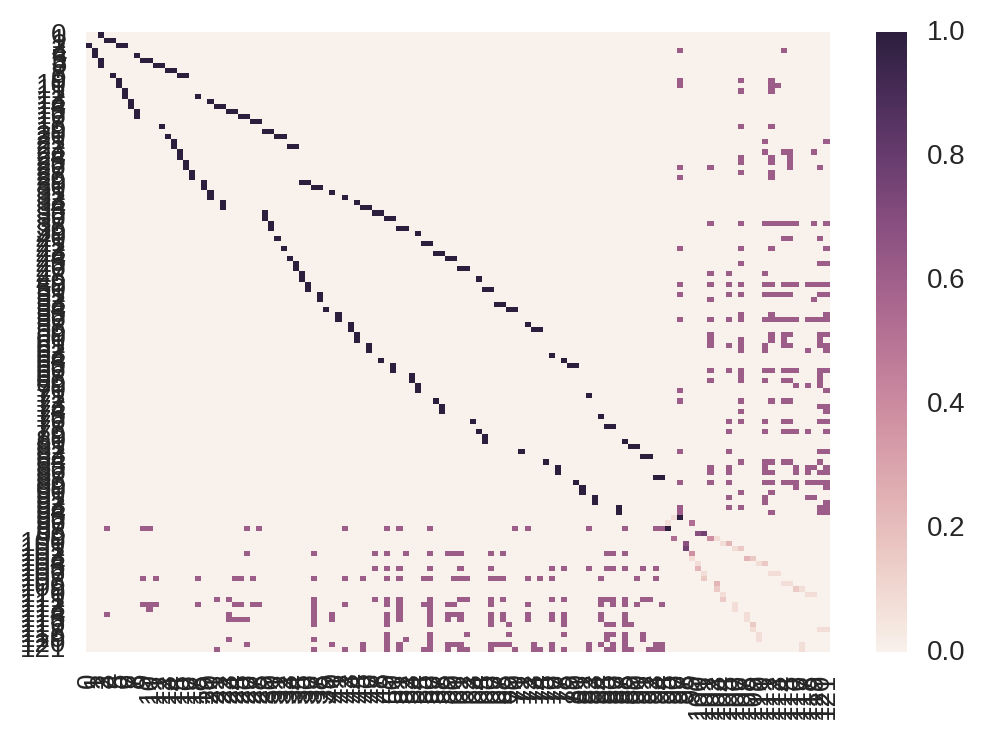

In [304]:
seaborn.heatmap( SLT.adjacency() )
#seaborn.kdeplot( SLT.spectrum() )